In [1]:
#작업 환경 설정 

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import missingno as msno
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
#csv 파일 데이터 로드 

In [4]:
data =pd.read_csv("data.csv")

/Users/codefreak/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,37,38,39,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.tail(3)

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Estimated Revenue Range,Operating Status,Founded Date,Founded Date Precision,...,Announced Date Precision,IPO Status,IPO Date,Price,Price Currency,Price Currency (in USD),Acquisition Status,Money Raised at IPO,Money Raised at IPO Currency,Money Raised at IPO Currency (in USD)
33063,American Petroleum Partners,https://www.crunchbase.com/organization/americ...,Oil and Gas,"Canonsburg, Pennsylvania, United States",American Petroleum Partners is an exploration ...,"35,459",NaN,Active,2014-01-01,year,...,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33064,RimRock Oil & Gas,https://www.crunchbase.com/organization/rimroc...,"Energy, Oil and Gas","Greenwood Village, Colorado, United States","RimRock Oil & Gas, LP is an independent oil an...","41,718",$1M to $10M,Active,2016-01-01,year,...,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33065,Seaborn Networks,https://www.crunchbase.com/organization/seabor...,"Crowdfunding, Finance, Financial Services, Mob...","Beverly, Massachusetts, United States",Seaborn Networks is comprised of telecom execu...,"25,936",$1M to $10M,Active,2011-01-01,year,...,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#결측값 시작적 확인해보기

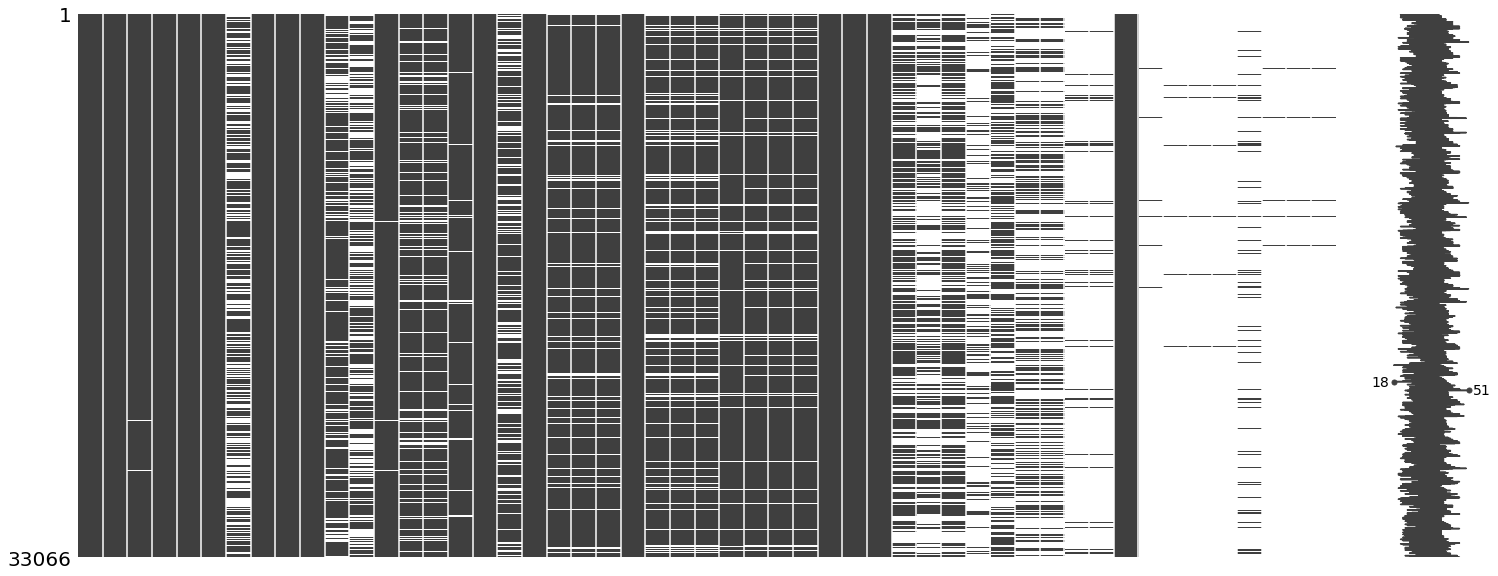

In [7]:
msno.matrix(data)
plt.show()

In [8]:
data["Industries"]

0                              Finance, Financial Services
1                                      Financial Exchanges
2                              Health Care, Medical Device
3        Augmented Reality, Education, Gaming, Law Enfo...
4                                              Health Care
                               ...                        
33061                Event Management, Events, Hospitality
33062    Biotechnology, Cloud Computing, Electronic Hea...
33063                                          Oil and Gas
33064                                  Energy, Oil and Gas
33065    Crowdfunding, Finance, Financial Services, Mob...
Name: Industries, Length: 33066, dtype: object

In [9]:
import industry

data =industry.industry()


/Users/codefreak/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (11,37,38,39,49) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/codefreak/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [10]:
#논문에서 스타트업 성공 정의 - M&A , IPO
#성공은 1 아닌건 0
#funding status열 에서 M&A,IPO 한 기업들만 success열에 넣기
data["success"]=data["Funding Status"].isin(['M&A', 'IPO']).astype(int)

In [11]:
data["Headquarters Location"]= data["Headquarters Location"].isin(['California']).astype(int)

In [12]:
#인더스트리 넣기 

in_list =('Administrative_Services',\
       'Advertising', 'Agriculture', 'Apps', 'Artificial_Intelligence',\
       'Biotechnology', 'Clothing_Apparel', 'Commerce_and_Shopping',\
       'Community_Lifestyle', 'Consumer_Electronics', 'Consumer_Goods',\
       'Content_Publishing', 'Data_Analytics', 'Design', 'Education', 'Energy',\
       'Events', 'Financial_Services', 'Food_Beverage', 'Gaming',\
       'Government_Military', 'Hardware', 'Health_care',\
       'Information_Technology', 'Lending_Investments', 'Internet_Services',\
       'Manufacturing', 'Media_Entertainment', 'Messaging_Telecommunications',\
       'Mobile', 'Music_Audio', 'Natural_Resources', 'Navigation_Mapping',\
       'Payments', 'Platforms', 'Privacy_Security', 'Professional_Services',\
       'Real_Estate', 'Sales_Marketing', 'Science_Engineering', 'Software',\
       'Sports', 'Sustainability', 'Transportation', 'Travel_Tourism',\
       'Video')

for i in in_list:
    
    data.loc[data[i]>0,"Industries"] = i
    

In [13]:
#angel투자자 상위 1000 명 기준 top5 에 있으면 1 아니면 0 

df_angel=pd.read_csv("angel_1000 (1).csv")
angel_list=df_angel["Organization/Person Name"]
a= list(angel_list)
a= str(a)

a =a.replace('\'', '')
a =a.replace('\n','')
a =a.replace(', ', '|' )
a =a.replace('[', '')
a =a.replace(']', '')

data['Top 5 Investors']=data['Top 5 Investors'].fillna("0")
k =data['Top 5 Investors'].str.contains(a)
data['Top 5 Investors'] = data['Top 5 Investors'][k] =1

/Users/codefreak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [14]:
data['Number of Employees']=data['Number of Employees'].fillna(0)

data.loc[data['Number of Employees'] == "1-10",'Number of Employees']=1
data.loc[data['Number of Employees'] =="11-50",'Number of Employees']=2
data.loc[data['Number of Employees'] =="51-100",'Number of Employees']=3
data.loc[data['Number of Employees'] =="101-250",'Number of Employees']=4
data.loc[data['Number of Employees'] =="251-500",'Number of Employees']=5
data.loc[data['Number of Employees'] =="501-1000",'Number of Employees']=6
data.loc[data['Number of Employees'] =="1001-5000",'Number of Employees']=7
data.loc[data['Number of Employees'] =="5001-10000",'Number of Employees']=8
data.loc[data['Number of Employees'] =="10001+",'Number of Employees']=9

In [15]:
data["Estimated Revenue Range"]=data["Estimated Revenue Range"].fillna(0)

data.loc[data["Estimated Revenue Range"] == "Less than $1M" ,"Estimated Revenue Range"] = 1
data.loc[data["Estimated Revenue Range"] == "$1M to $10M" ,"Estimated Revenue Range"] = 2
data.loc[data["Estimated Revenue Range"] == "$10M to $50M" ,"Estimated Revenue Range"] = 3
data.loc[data["Estimated Revenue Range"] == "$50M to $100M" ,"Estimated Revenue Range"] = 4
data.loc[data["Estimated Revenue Range"] == "$100M to $500M" ,"Estimated Revenue Range"] = 5
data.loc[data["Estimated Revenue Range"] == "$500M to $1B" ,"Estimated Revenue Range"] = 6
data.loc[data["Estimated Revenue Range"] == "$1B to $10B" ,"Estimated Revenue Range"] = 7
data.loc[data["Estimated Revenue Range"] == "$10B+" ,"Estimated Revenue Range"] = 8

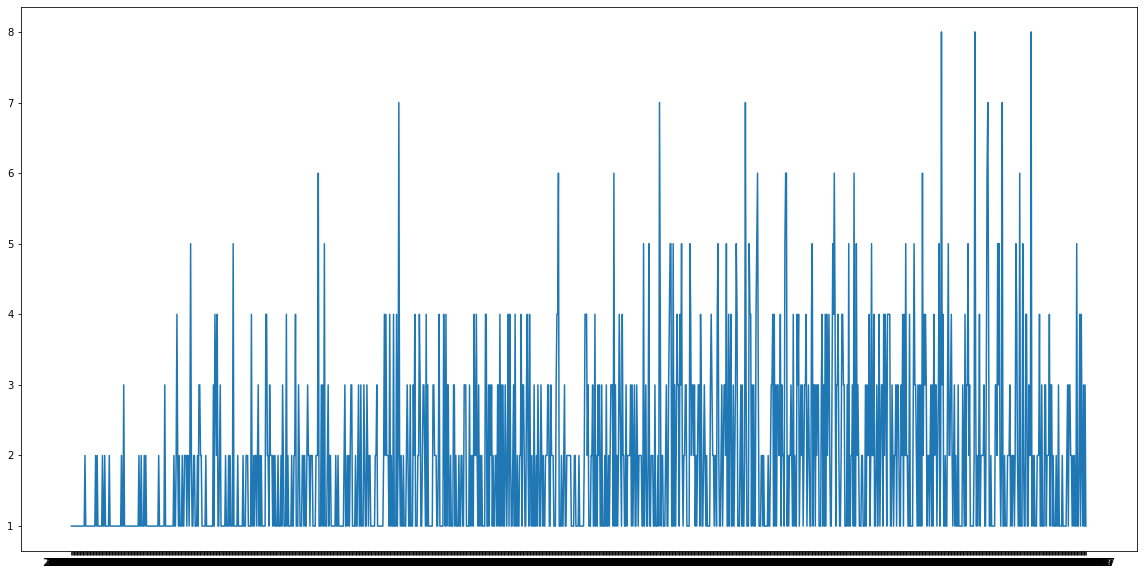

In [16]:
# M&A,ipo 데이터 시계열 만들기

data["IPO Date"] = data["IPO Date"].fillna(0)
data["Announced Date"] =data["Announced Date"].fillna(0)

IPO  =data[data["IPO Date"] !=0]
Announced = data[data["Announced Date"] != 0]

data["sweet"]=IPO["IPO Date"]
data["sweet"] = Announced["Announced Date"]

sweet_day =data["sweet"].dropna()
sweet_day_1 =sweet_day.drop_duplicates()
sweet_day_num= sweet_day.groupby(sweet_day).size()

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(sweet_day_1,sweet_day_num)
plt.show()

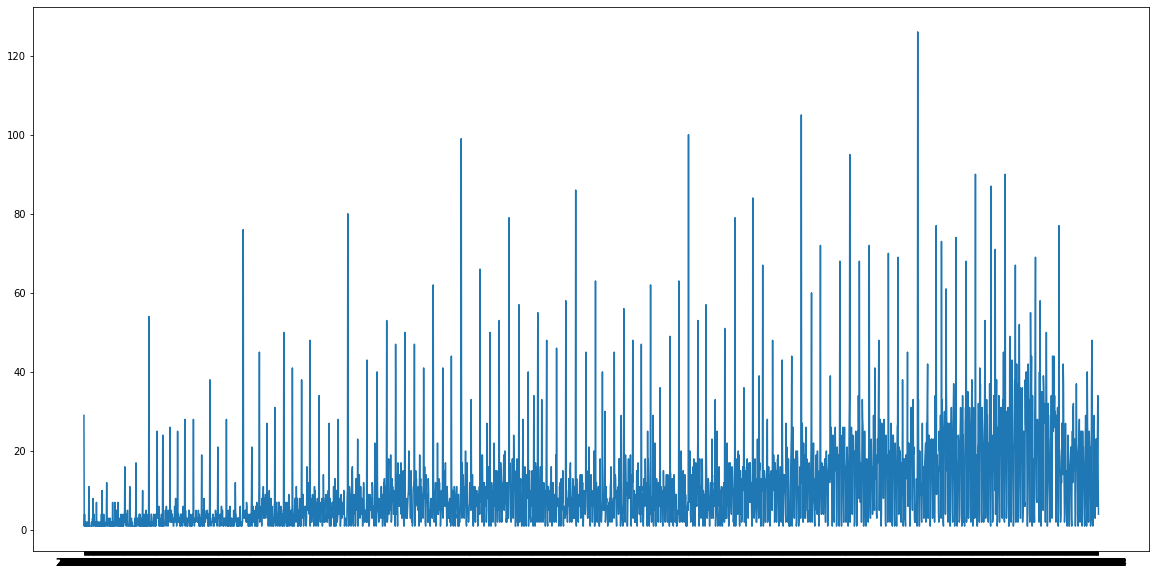

In [17]:
# funding _date 받은 회사 기준 시계열

Funding_date = data["Last Funding Date"].sort_values()
Funding_date_num =Funding_date.groupby(Funding_date).size()
Funding_date =Funding_date.drop_duplicates()


plt.rcParams["figure.figsize"] = (20,10)
plt.plot(Funding_date,Funding_date_num)
plt.show()


In [18]:
# 본격적인 데이터 분석을 위한 데이터 컬럼 정리
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('-', '')
data["CBRank"]=data["CBRank(Company)"] 



In [20]:
list(data.isnull().sum())

[1,
 0,
 354,
 0,
 0,
 64,
 0,
 0,
 0,
 0,
 8503,
 14298,
 504,
 5324,
 5324,
 0,
 0,
 8284,
 0,
 2786,
 2786,
 2786,
 0,
 4844,
 4844,
 4844,
 2154,
 2547,
 2547,
 2547,
 0,
 0,
 0,
 0,
 19598,
 11260,
 25897,
 14650,
 19236,
 19236,
 0,
 30515,
 0,
 0,
 32674,
 32674,
 32674,
 29304,
 32856,
 32856,
 32856,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 0,
 30515,
 64]